In [1]:
import networkx as nx
import osmnx as ox
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
from IPython.display import IFrame
from operator import attrgetter

ox.config(log_console=True, use_cache=True)


In [2]:
place = 'Piedmont, California, USA'
G = ox.graph_from_place(place, network_type='drive_service')
G = ox.project_graph(G)
## to be deleted
G = ox.graph_from_place(place, network_type='drive_service')
graph_map = ox.plot_graph_folium(G, popup_attribute='name', edge_width=2)

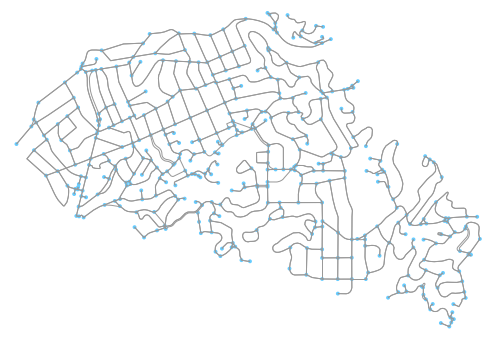

In [3]:
fig, ax = ox.plot_graph(G)

In [4]:
filepath = './graph.html'
graph_map.save(filepath)
IFrame(filepath, width=600, height=500)

In [5]:
source_node = G[53124805]
destination_node = G[5477879797]

class Node:
    # TODO : __slots__ not __dict___ -- Optimization
    def __init__(self, node, osmid, distance = 0, parent = None):
        self.node = node
        self.distance = distance
        self.parent = parent
        self.osmid = osmid
        
        # I need this for dijkstra
        self.from_origin = self.distance_from_origin()
    
    # TODO : list comprehension -- Optimization
    def expand(self):
        children = []
        for child in self.node:
            children.append(Node(G[child], child, distance = self.node[child][0]['length'], parent = self))
        return children
    
    def path(self):
        node = self
        path = []
        while node:
            path.append(node.osmid)
            node = node.parent
        return path[::-1]
    
    # TODO : better algorithm -- Optimization
    # I don't need to go to the parent to get the distance
    # every time I invoke the function
    
    def distance_from_origin(self):
        meters = 0
        node = self
        while node:
            meters += node.distance
            node = node.parent
        return meters

    def __eq__(self, other):
        return self.osmid == other.osmid
    
    def __hash__(self):
        return hash(self.osmid)
    
    
origin = Node(source_node, 53124805, distance = 0, parent = None)
print(origin.node)
print("******************************")
children = origin.expand()

for child in children:
    print(child.osmid)
    print(child.node)
    print("><><><><><><><")
print("-----------------------------llll---------------------")
nextgeneration = children[0].expand()

for node in nextgeneration:
    print(node.osmid)
    print(node.node)
    print("><><><><><><><")
print("--------------------------------------------------")

for node in nextgeneration:
    print(node.osmid)
    print(node.from_origin)
print("-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l")

nextnextgeneration = nextgeneration[0].expand()

for node in nextnextgeneration:
    print(node.osmid)
    print(node.node)
    print("><><><><><><><")
print("--------------------------------------------------")

for node in nextnextgeneration:
    print(node.osmid)
    print(node.from_origin)
print("-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l-l")

{53124807: {0: {'osmid': 6380382, 'highway': 'residential', 'name': 'Sea View Avenue', 'oneway': False, 'length': 126.23}}, 53124803: {0: {'osmid': 6380382, 'highway': 'residential', 'name': 'Sea View Avenue', 'oneway': False, 'length': 434.29499999999996, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fe1e42f1be0>}}, 2518218246: {0: {'osmid': 518506895, 'highway': 'tertiary', 'name': 'Hampton Road', 'lanes': '2', 'oneway': False, 'length': 38.315, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fe1e42f1c18>}}, 53125997: {0: {'osmid': 518506896, 'highway': 'tertiary', 'name': 'Hampton Road', 'oneway': False, 'length': 111.111, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fe1e42f1cc0>}}}
******************************
53124807
{53092201: {0: {'osmid': 6380382, 'highway': 'residential', 'name': 'Sea View Avenue', 'oneway': False, 'length': 148.657}}, 53124805: {0: {'osmid': 6380382, 'highway': 'residential', 'name': 'Sea View Avenue'

In [6]:
nextnextgeneration

In [7]:
# So using the following ling we could do Dijkstra

minimum = min(nextnextgeneration, key = attrgetter('from_origin'))

In [8]:
# TODO: better algorithm for picking the closest element in Dijkstra -- Readability

nextnextgeneration.remove(minimum) 

In [9]:
nextnextgeneration

In [10]:
node_Xs = [float(x) for _, x in G.nodes(data='x')]
node_Ys = [float(y) for _, y in G.nodes(data='y')]
edges = ox.graph_to_gdfs(G, nodes=False, fill_edge_geometry=True)
west, south, east, north = edges.total_bounds

In [14]:
# I copied that list from the BFS algorithm written at the bottom
# route = [53124805, 53125997, 53046251, 53046250, 53027463, 53152062, 53085382, 53023513, 53122757, 317339074, 53036558, 53095909, 53073843, 53152083, 53152069, 53152068, 5477879803, 5477879802, 53117166, 4918961128, 53062958, 4918961130, 5477879796, 5477879797]

# I copided that list from the DFS algorithm written at the bottom
# route = [53124805, 53125997, 53046251, 53046250, 53027463, 53027461, 53027459, 53074380, 53134227, 53118372, 53073822, 53097585, 53118368, 53059186, 683050194, 53097586, 53126347, 53126350, 53118380, 53112476, 53112473, 53112467, 245118288, 53059175, 53037307, 53059173, 53093372, 53059189, 53059166, 53093365, 53085387, 53093362, 53060467, 53060468, 53085385, 53111730, 53144625, 53137611, 53113946, 53076250, 2834093713, 53115407, 53041440, 53041442, 53042706, 53089336, 53093359, 53119166, 53119168, 2834814897, 53025057, 53082621, 318538000, 53082625, 206141022, 53082627, 53073691, 53033660, 53040495, 53085375, 53085377, 53027454, 53085380, 53021750, 53021742, 683050219, 53023513, 53122757, 317339074, 53036558, 53090323, 53090322, 53082634, 53082640, 53082643, 53076399, 53076395, 53100222, 53076392, 53100223, 53082631, 53152083, 53152069, 53152068, 5477879803, 5477879802, 53117166, 4918961128, 53062958, 53145241, 4918961132, 53018411, 53018397, 53018399, 53078914, 53085009, 682821166, 53062956, 53057704, 5477879796, 5477879797]

# I copied that list from Dijkstra algorithm written at the bottom
route = [53124805, 53125997, 53046251, 53046250, 53027463, 53152062, 53085382, 53023513, 53122757, 317339074, 53036558, 53095909, 53073843, 53152083, 53152069, 53152068, 5477879803, 5477879802, 53117166, 4918961128, 53062958, 4918961130, 5477879796, 5477879797]


In [15]:
route_map = ox.plot_route_folium(G, route)
route

[53124805,
 53125997,
 53046251,
 53046250,
 53027463,
 53152062,
 53085382,
 53023513,
 53122757,
 317339074,
 53036558,
 53095909,
 53073843,
 53152083,
 53152069,
 53152068,
 5477879803,
 5477879802,
 53117166,
 4918961128,
 53062958,
 4918961130,
 5477879796,
 5477879797]

In [16]:
filepath = 'route.html'
route_map.save(filepath)
IFrame(filepath, width=600, height=500)

In [99]:
nc = ['r' if node in route else '#336699' for node in G.nodes()]
ns = [50 if node in route else 8 for node in G.nodes()]

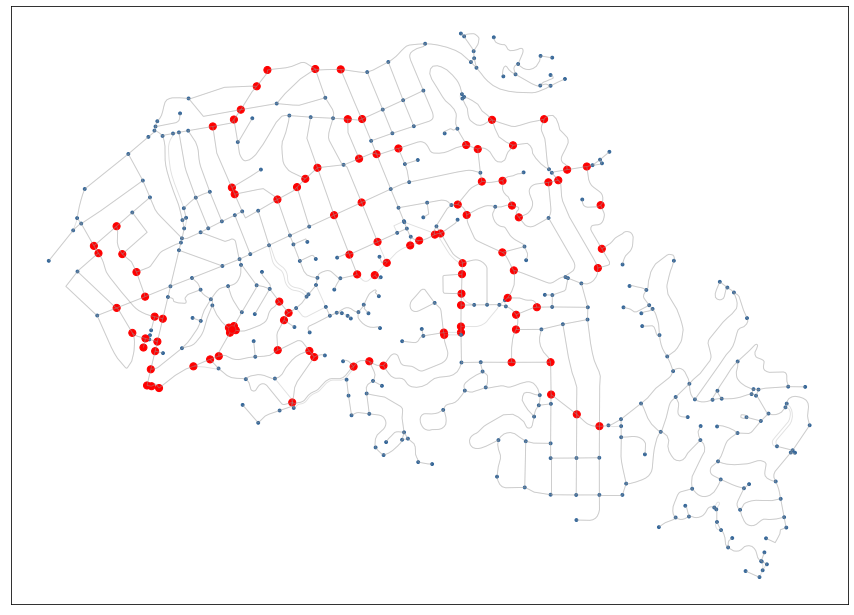

In [100]:
fig, ax = plt.subplots(figsize=(15,11))
ax.set_facecolor('w')

lines = []
for u, v, data in G.edges(keys=False, data=True):
        if 'geometry' in data:
            xs, ys = data['geometry'].xy
            lines.append(list(zip(xs, ys)))
        else:
            x1 = G.nodes[u]['x']
            y1 = G.nodes[u]['y']
            x2 = G.nodes[v]['x']
            y2 = G.nodes[v]['y']
            line = [(x1, y1), (x2, y2)]
            lines.append(line)
            
lc = LineCollection(lines, colors='#999999', linewidths=0.9, alpha=0.3)
ax.add_collection(lc)

y = ax.scatter(node_Xs, node_Ys, s=ns, c=nc)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()


In [92]:
from math import inf
from collections import deque
import sys

# TODO : delete these numbers -- readability

origin = Node(source_node, 53124805, distance = 0, parent = None)
destination = Node(destination_node, 5477879797)

In [94]:
# Breadth First Search 

frontier = deque([origin])
explored = set()
found = False
while frontier and not found:
    node = frontier.popleft()
    explored.add(node)
    if node == destination:
        print(node.path())
        found = True
        continue
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                print(child.path())
                found = True
                continue
            frontier.append(child)


[53124805, 53125997, 53046251, 53046250, 53027463, 53152062, 53085382, 53023513, 53122757, 317339074, 53036558, 53095909, 53073843, 53152083, 53152069, 53152068, 5477879803, 5477879802, 53117166, 4918961128, 53062958, 4918961130, 5477879796, 5477879797]


In [95]:
# Depth First Search

frontier = deque([origin])
explored = set()
found = False
while frontier and not found:
    node = frontier.pop()
    explored.add(node)
    if node == destination:
        print(node.path())
        found = True
        continue
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                print(child.path())
                found = True
                continue
            frontier.append(child)

[53124805, 53125997, 53046251, 53046250, 53027463, 53027461, 53027459, 53074380, 53134227, 53118372, 53073822, 53097585, 53118368, 53059186, 683050194, 53097586, 53126347, 53126350, 53118380, 53112476, 53112473, 53112467, 245118288, 53059175, 53037307, 53059173, 53093372, 53059189, 53059166, 53093365, 53085387, 53093362, 53060467, 53060468, 53085385, 53111730, 53144625, 53137611, 53113946, 53076250, 2834093713, 53115407, 53041440, 53041442, 53042706, 53089336, 53093359, 53119166, 53119168, 2834814897, 53025057, 53082621, 318538000, 53082625, 206141022, 53082627, 53073691, 53033660, 53040495, 53085375, 53085377, 53027454, 53085380, 53021750, 53021742, 683050219, 53023513, 53122757, 317339074, 53036558, 53090323, 53090322, 53082634, 53082640, 53082643, 53076399, 53076395, 53100222, 53076392, 53100223, 53082631, 53152083, 53152069, 53152068, 5477879803, 5477879802, 53117166, 4918961128, 53062958, 53145241, 4918961132, 53018411, 53018397, 53018399, 53078914, 53085009, 682821166, 53062956, 

In [133]:
frontier = [origin]
explored = set()
found = False
while frontier and not found:
    # This is the closest node to the origin .. this is pretty much Dijkstra algorithm
    node = min(frontier, key = attrgetter('from_origin'))
    frontier.remove(node)
    explored.add(node)
    if node == destination:
        print(node.path())
        found = True
        continue
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                print(child.path())
                found = True
                continue
            frontier.append(child)

[53124805, 53125997, 53046251, 53046250, 53027463, 53152062, 53085382, 53023513, 53122757, 317339074, 53036558, 53095909, 53073843, 53152083, 53152069, 53152068, 5477879803, 5477879802, 53117166, 4918961128, 53062958, 4918961130, 5477879796, 5477879797]
